In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
sns.set_style("whitegrid")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## preproccessing

In [4]:
df = pd.read_csv("KaggleV2-May-2016.csv")

In [5]:
df.shape

(110527, 14)

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
for column in df.columns:
    print(column ,df[column].dtype)

PatientId float64
AppointmentID int64
Gender object
ScheduledDay object
AppointmentDay object
Age int64
Neighbourhood object
Scholarship int64
Hipertension int64
Diabetes int64
Alcoholism int64
Handcap int64
SMS_received int64
No-show object


In [10]:
print('No-show',df['No-show'].unique())

No-show ['No' 'Yes']


In [11]:
df[df.duplicated(subset=['AppointmentID'], keep=False)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [12]:
# AppointmentDay regex
regex_pattern = r'^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z$'

all_values_match = df['AppointmentDay'].str.contains(regex_pattern).all()

if all_values_match:
    print("All values in the column follow the same regex pattern.")
else:
    print("Not all values in the column follow the same regex pattern.")

All values in the column follow the same regex pattern.


In [13]:
# ScheduledDay regex
regex_pattern = r'^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z$'

all_values_match = df['ScheduledDay'].str.contains(regex_pattern).all()

if all_values_match:
    print("All values in the column follow the same regex pattern.")
else:
    print("Not all values in the column follow the same regex pattern.")

All values in the column follow the same regex pattern.


In [14]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [15]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [16]:
df['duration_minutes'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.total_seconds() / 60

In [17]:
df[df['duration_minutes'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,duration_minutes
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1118.133333
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-968.450000
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-979.066667
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1049.516667
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-967.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,No,-530.333333
110512,9.876246e+13,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,No,-500.016667
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,-472.916667
110514,2.695685e+12,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,No,-515.516667


In [18]:
df.loc[df['duration_minutes'] < 0, 'duration_minutes'] = 0

In [19]:
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()

In [20]:
show_map = {'Yes': 1, 'No': 0}
df['No-show'] = df['No-show'].map(show_map)

In [21]:
df['Appointmentyear'] = df['AppointmentDay'].dt.year
df['Appointmentmonth'] = df['AppointmentDay'].dt.month
df['Appointmentday'] = df['AppointmentDay'].dt.day

In [22]:
df['Scheduledyear'] = df['ScheduledDay'].dt.year
df['Scheduledmonth'] = df['ScheduledDay'].dt.month
df['Scheduledday'] = df['ScheduledDay'].dt.day
df['Scheduledhour'] = df['ScheduledDay'].dt.hour
df['Scheduledminute'] = df['ScheduledDay'].dt.minute
df['Scheduledsecond'] = df['ScheduledDay'].dt.second

In [23]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,duration_minutes,ScheduledDay_DOW,AppointmentDay_DOW,Appointmentyear,Appointmentmonth,Appointmentday,Scheduledyear,Scheduledmonth,Scheduledday,Scheduledhour,Scheduledminute,Scheduledsecond
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.000000,Friday,Friday,2016,4,29,2016,4,29,18,38,8
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.000000,Friday,Friday,2016,4,29,2016,4,29,16,8,27
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.000000,Friday,Friday,2016,4,29,2016,4,29,16,19,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.000000,Friday,Friday,2016,4,29,2016,4,29,17,29,31
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0.000000,Friday,Friday,2016,4,29,2016,4,29,16,7,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,49844.416667,Tuesday,Tuesday,2016,6,7,2016,5,3,9,15,35
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,49952.450000,Tuesday,Tuesday,2016,6,7,2016,5,3,7,27,33
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,58076.133333,Wednesday,Tuesday,2016,6,7,2016,4,27,16,3,52
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,58130.616667,Wednesday,Tuesday,2016,6,7,2016,4,27,15,9,23


In [24]:
all_values_are_midnight = (df['AppointmentDay'].dt.time == pd.Timestamp('00:00:00').time()).all()

print(all_values_are_midnight)

True


In [25]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,duration_minutes,ScheduledDay_DOW,AppointmentDay_DOW,Appointmentyear,Appointmentmonth,Appointmentday,Scheduledyear,Scheduledmonth,Scheduledday,Scheduledhour,Scheduledminute,Scheduledsecond
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0,0.0,Monday,Monday,2016,6,6,2016,6,6,8,58,13


In [26]:
df = df[df['Age']>=0]

In [27]:
df = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'])

## visualizing

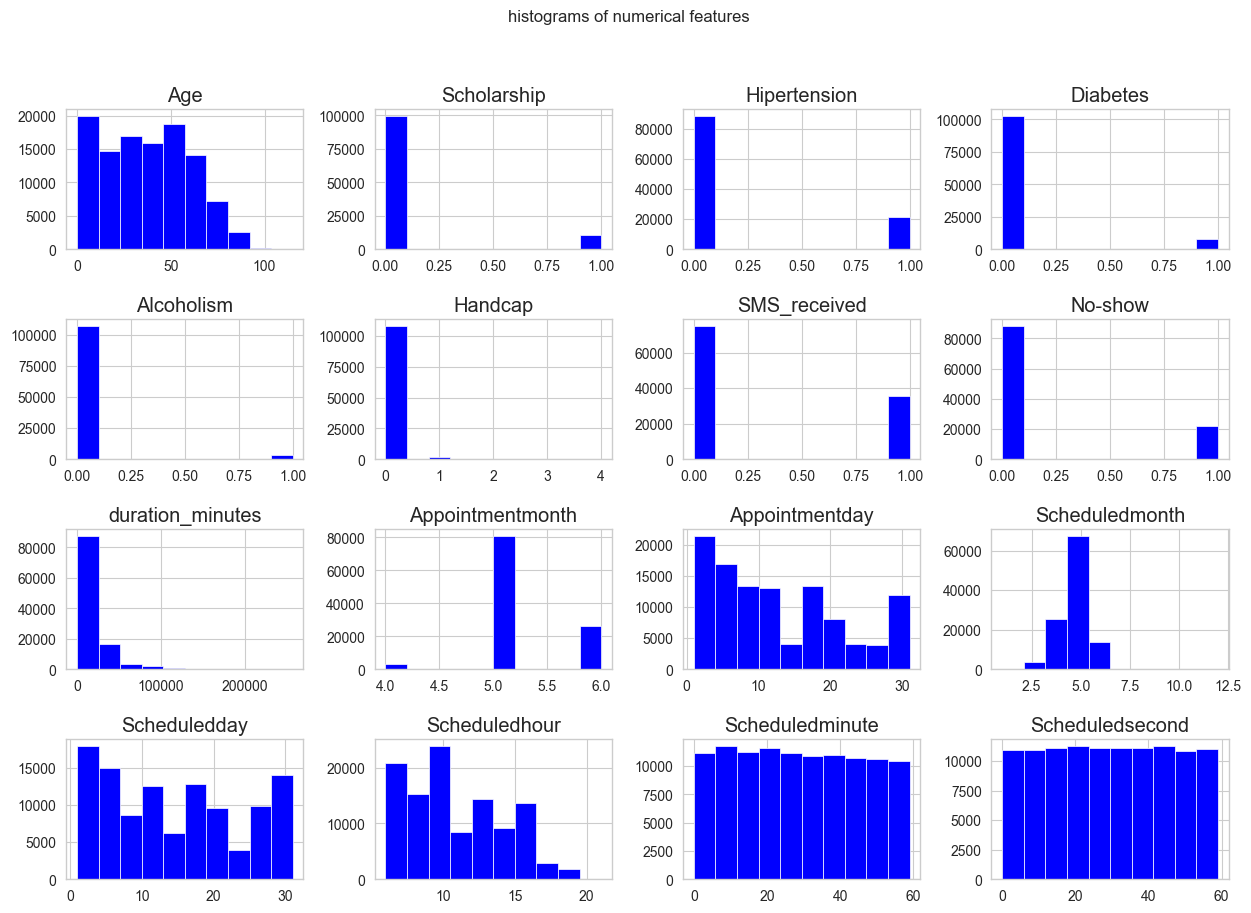

In [28]:
df.drop(columns=['Scheduledyear', 'Appointmentyear']).hist(figsize=(15,10), color = 'blue')

plt.subplots_adjust(hspace=0.5)
plt.suptitle("histograms of numerical features")
plt.show()


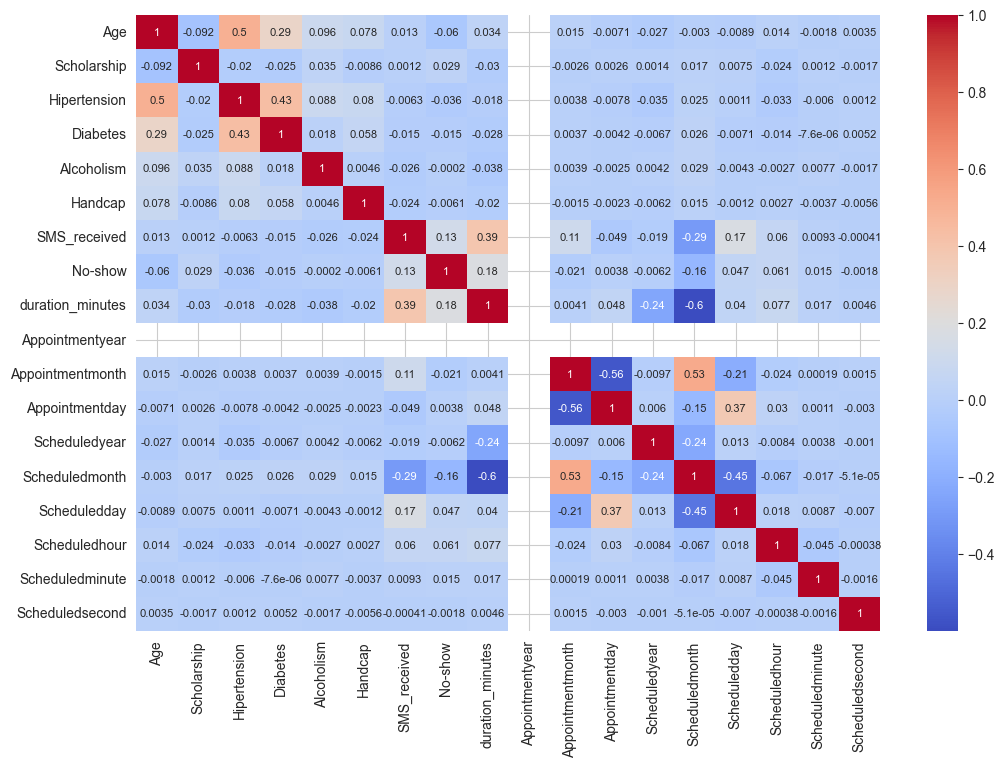

In [25]:
plt.figure(figsize=(12,8))
dataplot = sns.heatmap(df.drop(columns=['ScheduledDay_DOW', 'AppointmentDay_DOW', 'Gender', 'Neighbourhood']).corr(), cmap='coolwarm', annot=True, annot_kws={"fontsize":8})
plt.show()

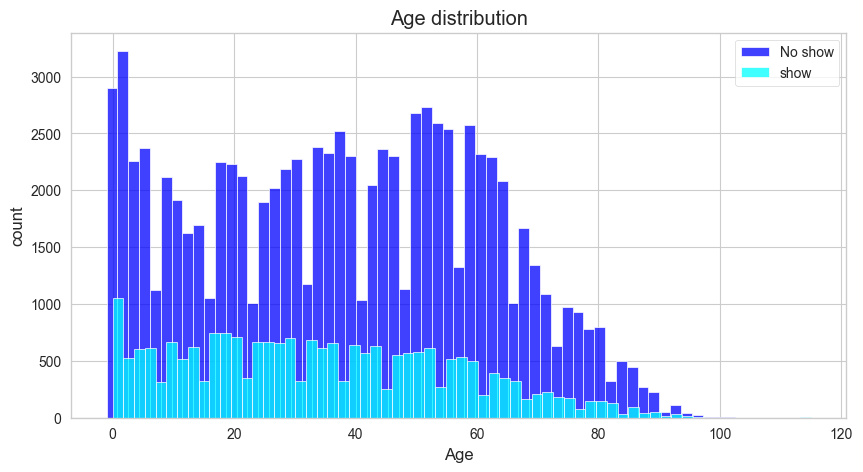

In [23]:
df_show = df.loc[df['No-show'] == 1]
df_no_show = df.loc[df['No-show'] == 0]
plt.figure(figsize=(10,5))
sns.histplot(data = df_no_show, x = 'Age', color = 'blue', bins = 65)
sns.histplot(data = df_show, x = 'Age', color = 'cyan', bins = 65)
plt.title('Age distribution')
plt.legend(["No show", "show"])
plt.ylabel("count")
plt.show()

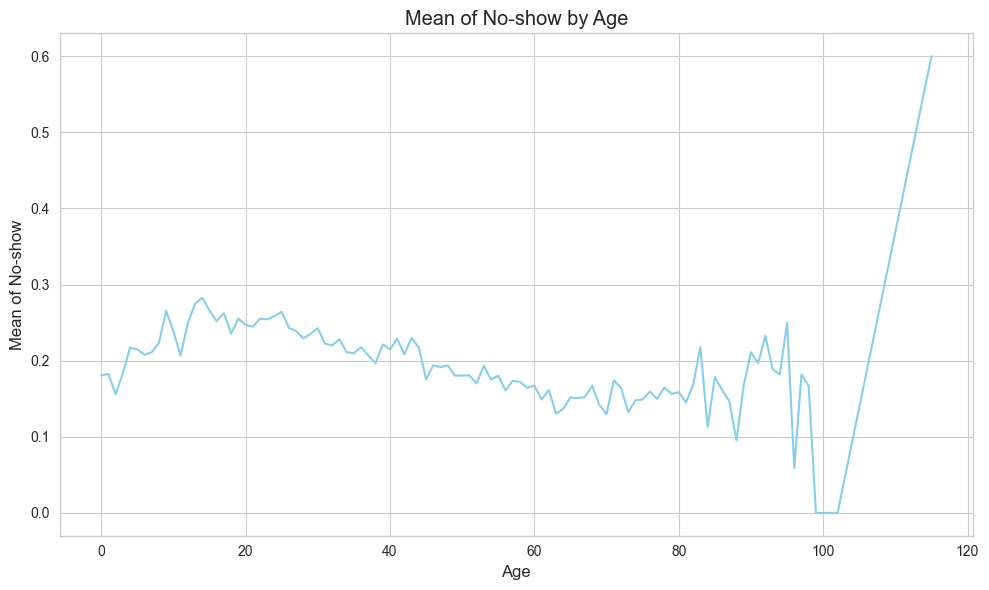

In [26]:
age_no_show_mean = df.groupby('Age')['No-show'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_no_show_mean.index, y=age_no_show_mean.values, color='skyblue')
plt.title('Mean of No-show by Age')
plt.xlabel('Age')
plt.ylabel('Mean of No-show')
plt.tight_layout()
plt.show()

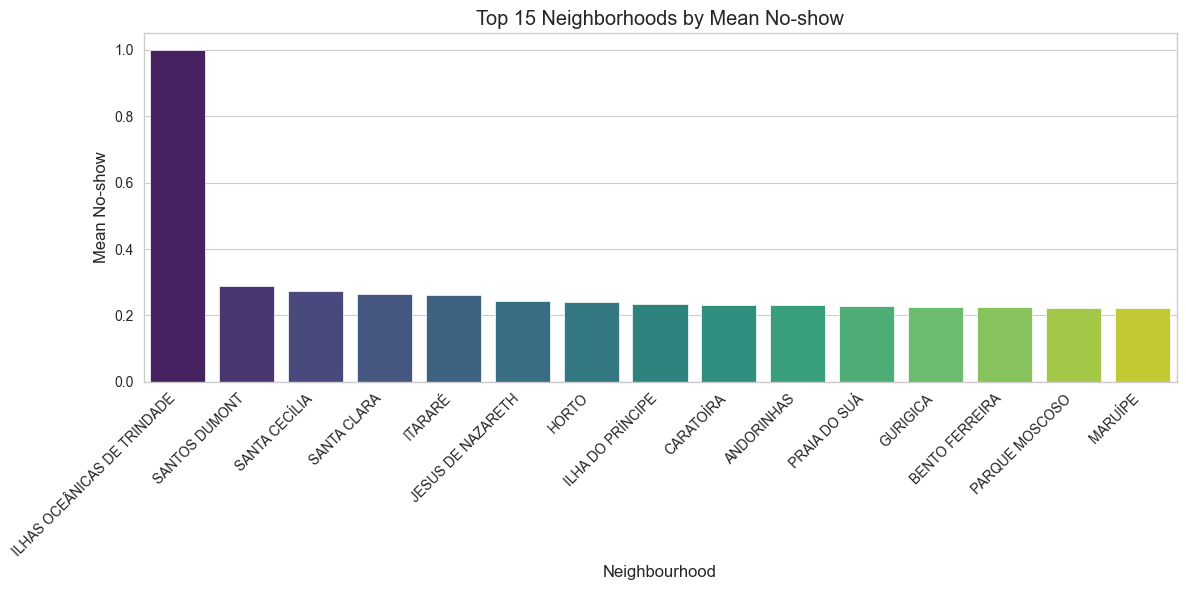

In [31]:
neighborhood_no_show_mean = df.groupby('Neighbourhood')['No-show'].mean()
sorted_neighborhoods = neighborhood_no_show_mean.sort_values(ascending=False)
top_15_neighborhoods = sorted_neighborhoods.head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_neighborhoods.index, y=top_15_neighborhoods.values, palette='viridis')
plt.title('Top 15 Neighborhoods by Mean No-show')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean No-show')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
print('Neighbourhood',len(df['Neighbourhood'].unique()))

Neighbourhood 81


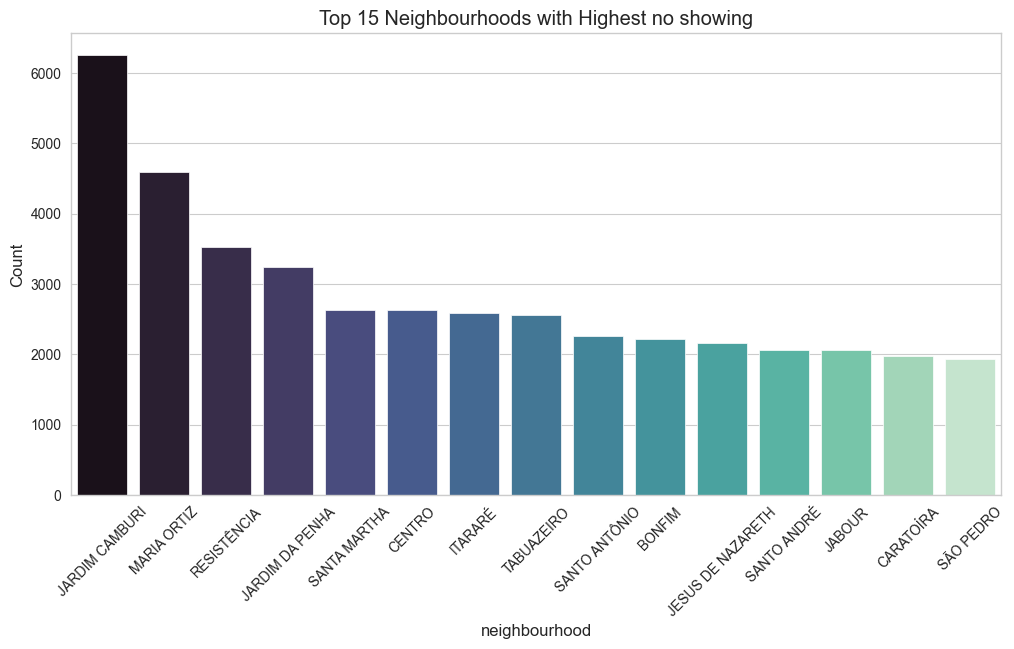

In [36]:
department_counts = df[df['No-show'] == 0]['Neighbourhood'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='mako')
plt.title('Top 15 Neighbourhoods with Highest no showing')
plt.xlabel('neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

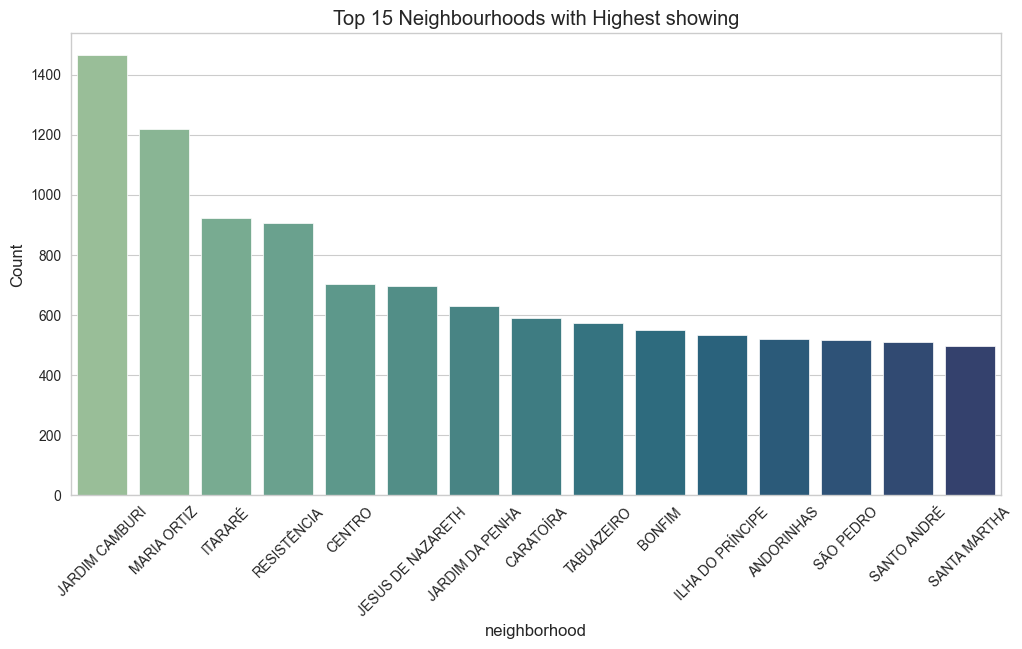

In [37]:
department_counts = df[df['No-show'] == 1]['Neighbourhood'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='crest')
plt.title('Top 15 Neighbourhoods with Highest showing')
plt.xlabel('neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,duration_minutes,ScheduledDay_DOW,AppointmentDay_DOW,Appointmentyear,Appointmentmonth,Appointmentday,Scheduledyear,Scheduledmonth,Scheduledday,Scheduledhour,Scheduledminute,Scheduledsecond
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.0,Friday,Friday,2016,4,29,2016,4,29,18,38,8
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.0,Friday,Friday,2016,4,29,2016,4,29,16,8,27
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.0,Friday,Friday,2016,4,29,2016,4,29,16,19,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.0,Friday,Friday,2016,4,29,2016,4,29,17,29,31
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0.0,Friday,Friday,2016,4,29,2016,4,29,16,7,23


## encoding

In [28]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [29]:
df = pd.get_dummies(df, columns=['Neighbourhood'], drop_first=True)

In [30]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}


df['ScheduledDay_DOW'] = df['ScheduledDay_DOW'].map(day_mapping)
df['schedule_day_sin'] = np.sin(2 * np.pi * df['ScheduledDay_DOW'] / 7)
df['schedule_day_cos'] = np.cos(2 * np.pi * df['ScheduledDay_DOW'] / 7)

df['AppointmentDay_DOW'] = df['AppointmentDay_DOW'].map(day_mapping)
df['appointment_day_sin'] = np.sin(2 * np.pi * df['AppointmentDay_DOW'] / 7)
df['appointment_day_cos'] = np.cos(2 * np.pi * df['AppointmentDay_DOW'] / 7)

In [31]:
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,duration_minutes,ScheduledDay_DOW,AppointmentDay_DOW,Appointmentyear,Appointmentmonth,Appointmentday,Scheduledyear,Scheduledmonth,Scheduledday,Scheduledhour,Scheduledminute,Scheduledsecond,Gender_M,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,schedule_day_sin,schedule_day_cos,appointment_day_sin,appointment_day_cos
0,62,0,1,0,0,0,0,0,0.0,4,4,2016,4,29,2016,4,29,18,38,8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.433884,-0.900969,-0.433884,-0.900969
1,56,0,0,0,0,0,0,0,0.0,4,4,2016,4,29,2016,4,29,16,8,27,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.433884,-0.900969,-0.433884,-0.900969
2,62,0,0,0,0,0,0,0,0.0,4,4,2016,4,29,2016,4,29,16,19,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False

In [32]:
df.drop(columns=['ScheduledDay_DOW', 'AppointmentDay_DOW'], inplace=True)

In [33]:
df = df.applymap(lambda x: int(x))

In [34]:
df.shape

(110526, 103)

## divide train and test

In [35]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (88421, 103)
Test set shape: (22105, 103)


## normalization

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# train
normalized_train = scaler.fit_transform(train_df)
train_df = pd.DataFrame(normalized_train, columns=train_df.columns)

# test
normalized_test = scaler.fit_transform(test_df)
test_df = pd.DataFrame(normalized_test, columns=test_df.columns)

In [37]:
train_df

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,duration_minutes,Appointmentyear,Appointmentmonth,Appointmentday,Scheduledyear,Scheduledmonth,Scheduledday,Scheduledhour,Scheduledminute,Scheduledsecond,Gender_M,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,schedule_day_sin,schedule_day_cos,appointment_day_sin,appointment_day_cos
0,0.252174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,1.0,0.454545,0.000000,0.066667,0.847458,0.644068,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.321739,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.192247,0.0,0.5,0.066667,1.0,0.181818,0.933333,0.666667,0.152542,0.661017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.330435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.040705,0.0,0.5,0.633333,1.0,0.363636,0.366667,0.733333,0.559322,0.949153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.208696,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.170370,0.0,1.0,0.066667,1.0,0.363636,0.066667,0.466667,0.915254,0.864407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Separating X and target

In [38]:
from sklearn.model_selection import train_test_split

y_train = train_df['No-show'].values
X_train = train_df.drop(columns=['No-show']).values

y_test = test_df['No-show'].values
X_test = test_df.drop(columns=['No-show']).values


## Smote Balancing

In [39]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(random_state=42)
# train
X_train, y_train = smote.fit_resample(X_train, y_train)

## Training

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch

In [41]:
torch.manual_seed(42)
X_train, y_train = X_train, y_train
X_test, y_test = X_test, y_test

In [42]:
class data:
    def __init__(self, X, y, scale_data=True):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            if scale_data:
                X = StandardScaler().fit_transform(X)
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [43]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms

In [44]:
train_dataset = data(X_train, y_train, scale_data=False)
test_dataset = data(X_test, y_test, scale_data=False)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True, num_workers=0)

In [45]:
from model import MLP

In [46]:
mlp = MLP()

In [47]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4, weight_decay=0.001)

In [48]:
len(train_dataset.X)

92596

In [44]:
for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1)  # Reshape to 1D tensor
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        if i%10 == 0:
            print(f'Loss after mini-batch %5d: %.3f'%(i+1, current_loss/500))
            current_loss = 0.0
    print(f'Epoch {epoch+1} finished')

print("Training has completed")

Starting Epoch 1
Loss after mini-batch     1: 0.152
Loss after mini-batch    11: 0.551
Loss after mini-batch    21: 0.120
Loss after mini-batch    31: 0.072
Loss after mini-batch    41: 0.069
Loss after mini-batch    51: 0.050
Loss after mini-batch    61: 0.062
Loss after mini-batch    71: 0.030
Loss after mini-batch    81: 0.024
Loss after mini-batch    91: 0.055
Loss after mini-batch   101: 0.041
Loss after mini-batch   111: 0.037
Loss after mini-batch   121: 0.013
Loss after mini-batch   131: 0.023
Loss after mini-batch   141: 0.022
Loss after mini-batch   151: 0.046
Loss after mini-batch   161: 0.031
Loss after mini-batch   171: 0.018
Loss after mini-batch   181: 0.015
Loss after mini-batch   191: 0.015
Loss after mini-batch   201: 0.011
Loss after mini-batch   211: 0.024
Loss after mini-batch   221: 0.016
Loss after mini-batch   231: 0.016
Loss after mini-batch   241: 0.019
Loss after mini-batch   251: 0.009
Loss after mini-batch   261: 0.015
Loss after mini-batch   271: 0.062
Los

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1)  # Reshape to 1D tensor
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        
        # Append predictions and true labels for computing metrics
        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            # print(f'Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
            current_loss = 0.0
            
    # Calculate metrics after each epoch
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

print("Training has completed")


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.7344335269529342, Precision: 0.30510447264867263, Recall: 0.24665083561091447, F1 Score: 0.2727813289727962
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.7437978394223983, Precision: 0.3125156289072268, Recall: 0.22397956897710472, F1 Score: 0.2609421897429205
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.7504930966469427, Precision: 0.31704940848990953, Recall: 0.2041310094538286, F1 Score: 0.2483578184196898
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.7609974123735591, Precision: 0.3287636880381175, Recall: 0.17621757247188494, F1 Score: 0.22944985706784898
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.7691855310062791, Precision: 0.3360723089564503, Recall: 0.14660155024866706, F1 Score: 0.20414911870223054
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.7730669706675353, Precision: 0.3340939113726432, Recall: 0.12464716161118329, F1 Score: 0.18155713633100568
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.777943651267575, Precision: 0.33

In [50]:
import wandb

wandb.init(
    project="mlp",
    config={
    "learning_rate": 1e-4,
    "architecture": "MLP",
    "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


wandb: Network error (ReadTimeout), entering retry loop.


wandb: Network error resolved after 0:01:09.999966, resuming normal operation.


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1)  # Reshape to 1D tensor
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        
        # Append predictions and true labels for computing metrics
        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            # print(f'Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
            current_loss = 0.0
        wandb.log({"loss": loss})
            
    # Calculate metrics after each epoch
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.8063631258369692, Precision: 0.8035619101370206, Recall: 0.9046879412595312, F1 Score: 0.8511316650337921
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.8114929370599162, Precision: 0.8074347110030586, Recall: 0.9086063258966394, F1 Score: 0.8550381609653603
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.8141712384984232, Precision: 0.8094184824383892, Recall: 0.9107243716464276, F1 Score: 0.8570882785312659
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.8173247224502138, Precision: 0.8114742534681402, Recall: 0.9137249364586275, F1 Score: 0.8595694514781945
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.8198734286578254, Precision: 0.8137961349471734, Recall: 0.914960463146004, F1 Score: 0.8614183041834573
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.8216229642749147, Precision: 0.8149391918399372, Recall: 0.916619598983338, F1 Score: 0.8627939625023883
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.8247656486241306, Precision: 0.8174565784101

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

## test for model 1

In [62]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()

In [56]:
mlp.eval() 

MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=102, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=64, bias=True)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=2, bias=True)
    (8): Sigmoid()
  )
)

In [57]:
with torch.no_grad():
    outputs = mlp(test_data)
    predicted_labels = outputs.squeeze().tolist()

In [58]:
len(predicted_labels)

22105

In [53]:
predicted_labels = np.array(predicted_labels)

In [54]:
predicted_labels

array([[8.31599414e-01, 1.67422071e-01],
       [9.89282131e-01, 1.07094878e-02],
       [1.92943335e-01, 8.06015730e-01],
       ...,
       [7.39002526e-01, 2.60020196e-01],
       [1.00376608e-04, 9.99903917e-01],
       [8.47146875e-05, 9.99919057e-01]])

In [60]:
predicted_classes = np.argmax(predicted_labels, axis=1)

In [56]:
predicted_classes

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [57]:
test_targets

tensor([0., 0., 0.,  ..., 1., 0., 0.])

In [61]:
test_targets = np.array(test_targets)

mse = mean_squared_error(test_targets, predicted_classes)
r2 = r2_score(test_targets, predicted_classes)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.42501696448767246
R2 Score: -1.5899086596854008


In [62]:
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.52      0.66     17531
         1.0       0.30      0.80      0.44      4574

    accuracy                           0.57     22105
   macro avg       0.60      0.66      0.55     22105
weighted avg       0.78      0.57      0.61     22105



In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Classification Metrics:
Accuracy: 0.5749830355123275
Precision: 0.30099892677288864
Recall: 0.7971141233056406
F1 Score: 0.43698687601126623


## model 2

In [49]:
from model import MLP_dropout

In [49]:
class MLP_dropout(nn.Module):
        def __init__(self, dropout_prob=0.5):
            super().__init__()
            self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(102, 128),
            nn.Dropout(dropout_prob),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.Dropout(dropout_prob),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.Dropout(dropout_prob),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
            nn.Sigmoid()
            )
            self.initialize_weights()


        def initialize_weights(self):
            for layer in self.layers:
                if isinstance(layer, nn.Linear):
                    if layer == self.layers[-1]:
                        nn.init.xavier_uniform_(layer.weight)
                    else:
                        nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='relu')


        def forward(self, x):
            return self.layers(x)
        

In [50]:
model2 = MLP_dropout()

In [51]:
import wandb

wandb.init(
    project="mlp",
    config={
    "learning_rate": 1e-4,
    "architecture": "MLP",
    "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [52]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4, weight_decay=0.001)

## train with dropout

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1)  # Reshape to 1D tensor
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        
        # Append predictions and true labels for computing metrics
        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            # print(f'Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    # Calculate metrics after each epoch
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"loss per epoch": current_loss, "acc per epoch": accuracy})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.7206358805995939, Precision: 0.7247036842412565, Recall: 0.8763061282123694, F1 Score: 0.7933271547729378
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.7807464685299581, Precision: 0.7836699023065639, Recall: 0.8863315447613669, F1 Score: 0.8318452134444315
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.7902393191930537, Precision: 0.787927061261735, Recall: 0.8991986726913301, F1 Score: 0.8398934986357605
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.7952071363773813, Precision: 0.7902810935695033, Recall: 0.9056234114656877, F1 Score: 0.8440299059886002
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.7974210549051794, Precision: 0.7919092953754198, Recall: 0.9073354984467664, F1 Score: 0.8457020646541087
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.8001857531642835, Precision: 0.7953095975232198, Recall: 0.9068236373905676, F1 Score: 0.8474137362274856
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.8022592768586116, Precision: 0.797154458944

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

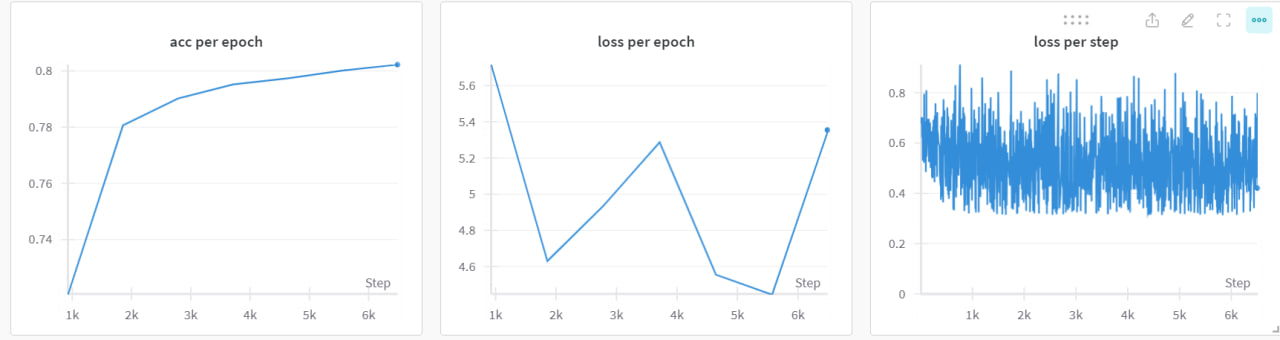

## training with dropout with he initialization

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1)  # Reshape to 1D tensor
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        
        # Append predictions and true labels for computing metrics
        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            # print(f'Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    # Calculate metrics after each epoch
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.6649639293274008, Precision: 0.6808886003415522, Recall: 0.8515073425585993, F1 Score: 0.7566995270922053
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.7411767246965312, Precision: 0.756191222570533, Recall: 0.8515426433210957, F1 Score: 0.8010393836753669
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.7714912091235042, Precision: 0.775644908291789, Recall: 0.8815129906805987, F1 Score: 0.8251972406956091
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.7819776232234654, Precision: 0.7825399776868724, Recall: 0.8913795537983621, F1 Score: 0.8334213479437587
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.7894077497948075, Precision: 0.7868126099978386, Recall: 0.8995516803162948, F1 Score: 0.8394136539570123
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.7930472158624563, Precision: 0.7895525384983705, Recall: 0.9022521886472747, F1 Score: 0.8421486173691711
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.7969566719944706, Precision: 0.7915107271019

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

## test for model 3

In [54]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()

In [55]:
with torch.no_grad():
    outputs = model2(test_data)
    predicted_labels = outputs.squeeze().tolist()

In [56]:
predicted_labels = np.array(predicted_labels)

In [57]:
predicted_classes = np.argmax(predicted_labels, axis=1)

In [58]:
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.49      0.64     17531
         1.0       0.30      0.82      0.43      4574

    accuracy                           0.56     22105
   macro avg       0.60      0.65      0.54     22105
weighted avg       0.78      0.56      0.60     22105



In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Classification Metrics:
Accuracy: 0.5586518887129609
Precision: 0.2955979804354686
Recall: 0.8191954525579361
F1 Score: 0.43443478260869556


## training with tanh activation function 

In [45]:
class MLP_TanH(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(102, 128),
            nn.Tanh(),
            nn.Linear(128, 256),
            nn.Tanh(),
            nn.Linear(256, 64),
            nn.Tanh(),
            nn.Linear(64, 2),
            nn.Sigmoid()
            )  

        def forward(self, x):
            return self.layers(x)
        

In [46]:
model3 = MLP_TanH()

In [47]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-4, weight_decay=0.001)

In [48]:
import wandb

wandb.init(
    project="mlp",
    config={
    "learning_rate": 1e-4,
    "architecture": "MLP",
    "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1)  # Reshape to 1D tensor
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        
        # Append predictions and true labels for computing metrics
        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            # print(f'Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    # Calculate metrics after each epoch
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.7410471294656357, Precision: 0.7533021207987102, Recall: 0.8576496752329851, F1 Score: 0.8020964014526246
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.7816752343513759, Precision: 0.7933410613086038, Recall: 0.869740186388026, F1 Score: 0.8297858008891282
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.7842779385718606, Precision: 0.79420587433228, Recall: 0.8738703756001129, F1 Score: 0.8321358040253792
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.7844831310207785, Precision: 0.793750400204905, Recall: 0.8751765038124824, F1 Score: 0.8324770827037373
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.785703486111711, Precision: 0.7946690146482029, Recall: 0.8761472747811353, F1 Score: 0.8334214790003442
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.7868914423949198, Precision: 0.7953887262196195, Recall: 0.8774181022310081, F1 Score: 0.8343921782552138
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.787204630869584, Precision: 0.7956538436919925,

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

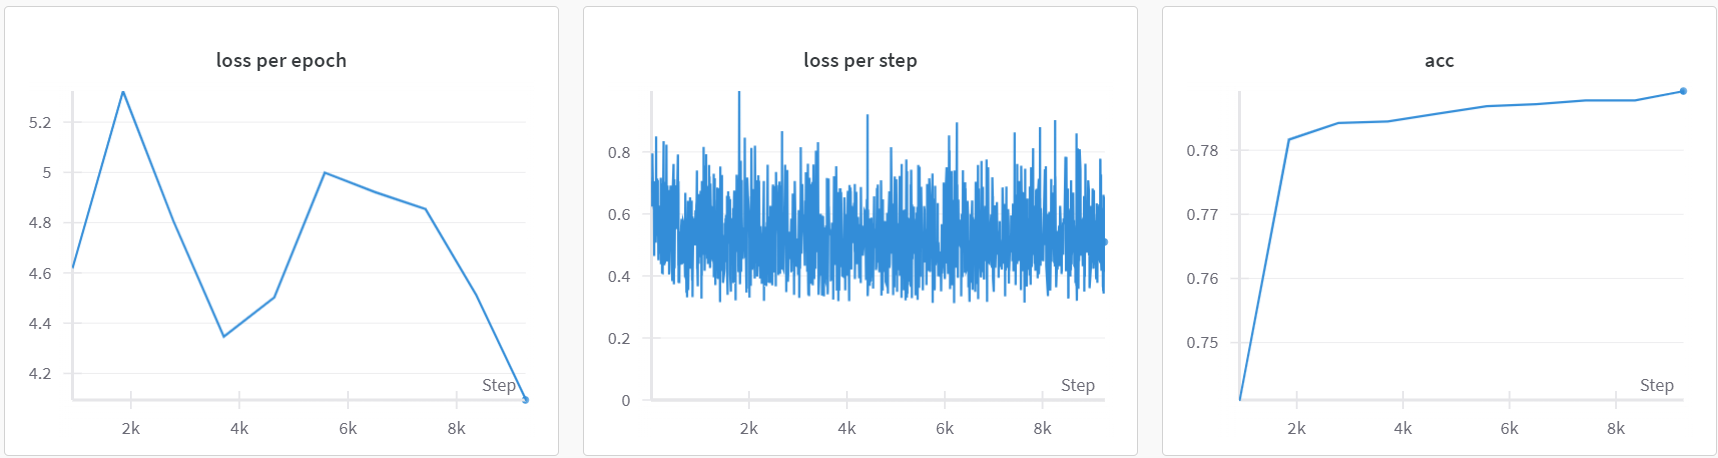

In [50]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model3(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.52      0.66     17531
         1.0       0.30      0.80      0.44      4574

    accuracy                           0.57     22105
   macro avg       0.60      0.66      0.55     22105
weighted avg       0.78      0.57      0.61     22105


Classification Metrics:
Accuracy: 0.5743949332730152
Precision: 0.3007091029023747
Recall: 0.7973327503279405
F1 Score: 0.43671416596814755


## training with sigmoid activation function

In [45]:
class MLP_sigmoid(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(102, 128),
            nn.Sigmoid(),
            nn.Linear(128, 256),
            nn.Sigmoid(),
            nn.Linear(256, 64),
            nn.Sigmoid(),
            nn.Linear(64, 2),
            nn.Sigmoid()
            )  

        def forward(self, x):
            return self.layers(x)
        

In [46]:
model4 = MLP_sigmoid()

In [47]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-4, weight_decay=0.001)

In [48]:
import wandb

wandb.init(
    project="mlp",
    config={
    "learning_rate": 1e-4,
    "architecture": "MLP",
    "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cogokeye. Use `wandb login --relogin` to force relogin


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1)  # Reshape to 1D tensor
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model4(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        
        # Append predictions and true labels for computing metrics
        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            # print(f'Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    # Calculate metrics after each epoch
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.6116894898267744, Precision: 0.6118846345101939, Recall: 0.9990645297938435, F1 Score: 0.7589466486102359
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.6118622834679683, Precision: 0.6118622834679683, Recall: 1.0, F1 Score: 0.7591992067107978
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.6118622834679683, Precision: 0.6118622834679683, Recall: 1.0, F1 Score: 0.7591992067107978
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.6118622834679683, Precision: 0.6118622834679683, Recall: 1.0, F1 Score: 0.7591992067107978
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.6118622834679683, Precision: 0.6118622834679683, Recall: 1.0, F1 Score: 0.7591992067107978
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.6118622834679683, Precision: 0.6118622834679683, Recall: 1.0, F1 Score: 0.7591992067107978
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.6118622834679683, Precision: 0.6118622834679683, Recall: 1.0, F1 Score: 0.7591992067107978
Starting Epoch 8
Epoch 8 f

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

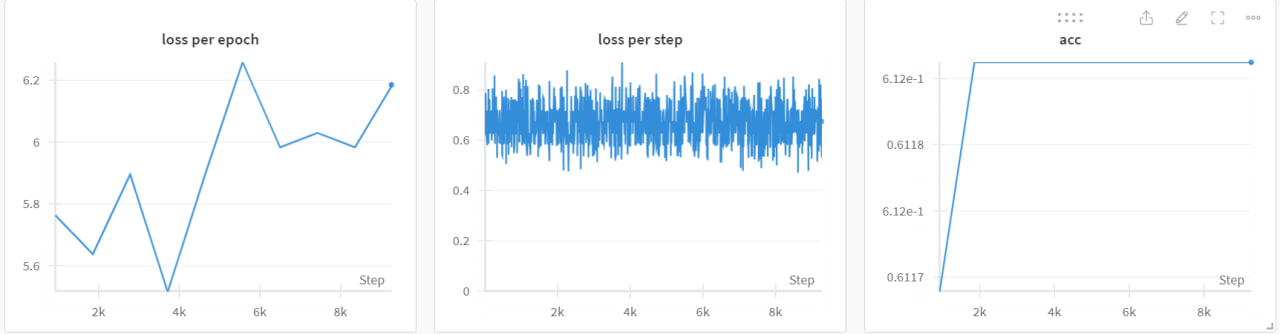

In [51]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model4(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     17531
         1.0       0.21      1.00      0.34      4574

    accuracy                           0.21     22105
   macro avg       0.10      0.50      0.17     22105
weighted avg       0.04      0.21      0.07     22105


Classification Metrics:
Accuracy: 0.2069215109703687
Precision: 0.2069215109703687
Recall: 1.0
F1 Score: 0.3428914127216163


c:\Users\Rina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## training with leaky relu

In [48]:
class MLP_leaky_relu(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(102, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 2),
            nn.Sigmoid()
            )  

        def forward(self, x):
            return self.layers(x)
        

In [49]:
model5 = MLP_leaky_relu()

In [50]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-4, weight_decay=0.001)

In [51]:
import wandb

wandb.init(
    project="mlp",
    config={
    "learning_rate": 1e-4,
    "architecture": "MLP",
    "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cogokeye. Use `wandb login --relogin` to force relogin


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1) 
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model5(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()

        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.7491900298069031, Precision: 0.7494478600847609, Recall: 0.8864374470488563, F1 Score: 0.8122068764757253
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.7917512635535012, Precision: 0.7938359933957072, Recall: 0.8910618469358939, F1 Score: 0.8396437451663603
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.7985334139703659, Precision: 0.7986983383377089, Recall: 0.8967452696978254, F1 Score: 0.8448867935510156
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.8036956240010368, Precision: 0.8017250842938917, Recall: 0.9023227901722677, F1 Score: 0.8490545668944784
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.8068707071579766, Precision: 0.804230811480941, Recall: 0.9045467382095453, F1 Score: 0.8514441887704666
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.8114389390470431, Precision: 0.8073713927227102, Recall: 0.9086063258966394, F1 Score: 0.855002657454159
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.8152619983584604, Precision: 0.8097296619991

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

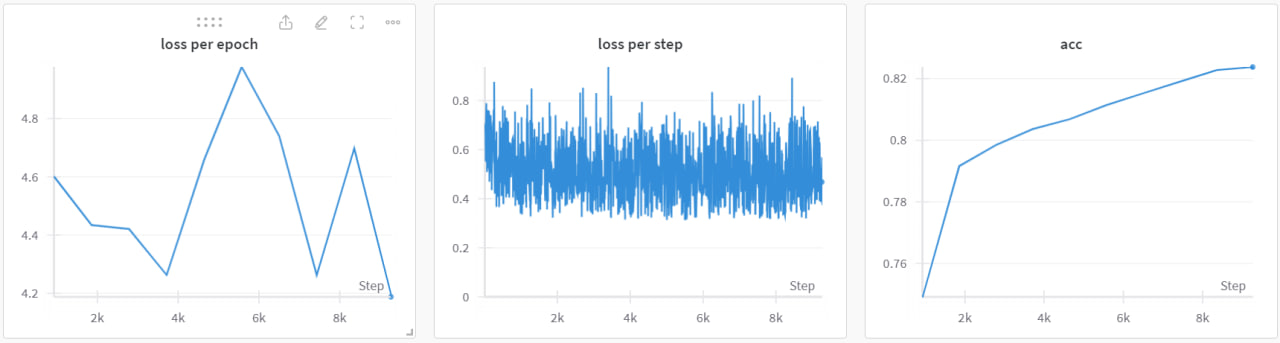

In [54]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model5(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.46      0.61     17531
         1.0       0.29      0.85      0.43      4574

    accuracy                           0.54     22105
   macro avg       0.61      0.65      0.52     22105
weighted avg       0.79      0.54      0.58     22105


Classification Metrics:
Accuracy: 0.5413707306039358
Precision: 0.2909528103396453
Recall: 0.8465238303454307
F1 Score: 0.433061178839056


## training with SGD optimizer

In [46]:
class MLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(102, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
            nn.Sigmoid()
            )

        def forward(self, x):
            return self.layers(x)

In [47]:
model6 = MLP()

In [49]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model6.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

In [50]:
import wandb

wandb.init(
    project="mlp",
    config={
    "learning_rate": 1e-4,
    "architecture": "MLP",
    "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


wandb: Network error resolved after 0:01:09.355751, resuming normal operation.


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1) 
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model6(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()

        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.7195559203421314, Precision: 0.7186440194932885, Recall: 0.8901616774922338, F1 Score: 0.7952599460712427
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.7766642187567497, Precision: 0.7793948619179274, Recall: 0.8856784806551822, F1 Score: 0.8291445661693022
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.7807464685299581, Precision: 0.7815171602031966, Recall: 0.8906558881671844, F1 Score: 0.8325249125585693
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.782420406929025, Precision: 0.7831076784689589, Recall: 0.8912383507483762, F1 Score: 0.8336814298097165
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.7837595576482785, Precision: 0.7833836156880947, Recall: 0.893709404123129, F1 Score: 0.834917677321483
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.7857790833297335, Precision: 0.7850904360753221, Recall: 0.8948390285230161, F1 Score: 0.836379833707272
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.7852391032010022, Precision: 0.784897415235852

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

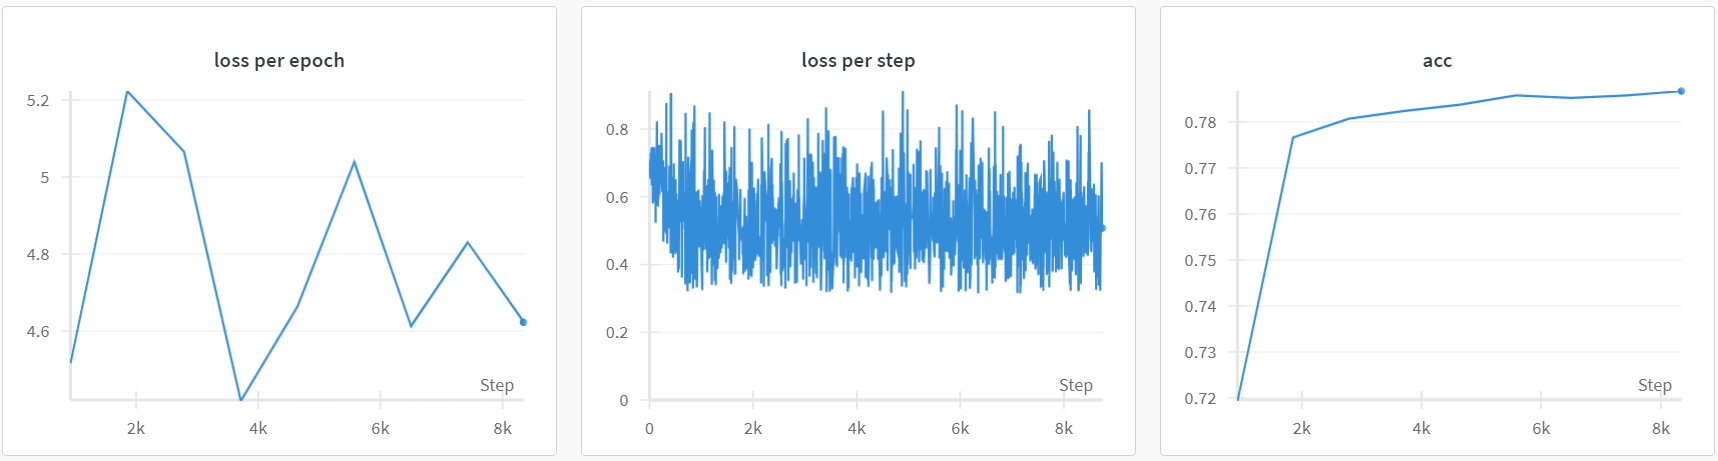

In [52]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model6(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.50      0.65     17531
         1.0       0.30      0.81      0.44      4574

    accuracy                           0.57     22105
   macro avg       0.60      0.66      0.54     22105
weighted avg       0.78      0.57      0.60     22105


Classification Metrics:
Accuracy: 0.565980547387469
Precision: 0.2981990673741759
Recall: 0.8108876257105379
F1 Score: 0.4360451446038091


## training with batch normalization

In [46]:
class MLP_BatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(102, 128),
            nn.BatchNorm1d(128), 
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256), 
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)


In [47]:
model7 = MLP_BatchNorm()

In [48]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model7.parameters(), lr=1e-4, weight_decay=0.001)

In [49]:
import wandb

wandb.init(
    project="mlp",
    config={
    "learning_rate": 1e-4,
    "architecture": "MLP",
    "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cogokeye. Use `wandb login --relogin` to force relogin


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1) 
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model7(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()

        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.7436822324938442, Precision: 0.7670852803738317, Recall: 0.8344570742728042, F1 Score: 0.7993541187609902
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.7809948593891745, Precision: 0.7882077041309481, Recall: 0.8779829144309517, F1 Score: 0.8306767419529913
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.7911356862067476, Precision: 0.7985757721235398, Recall: 0.8808069754306693, F1 Score: 0.8376781427828043
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.7990949933042464, Precision: 0.8060940491320645, Recall: 0.884390002824061, F1 Score: 0.8434288599924251
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.8041384077065964, Precision: 0.8104248597769325, Recall: 0.8874964699237503, F1 Score: 0.8472114574557709
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.8074862845047303, Precision: 0.8135699980618903, Recall: 0.8891026546173397, F1 Score: 0.849660965489323
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.810574970841073, Precision: 0.81765470196524

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

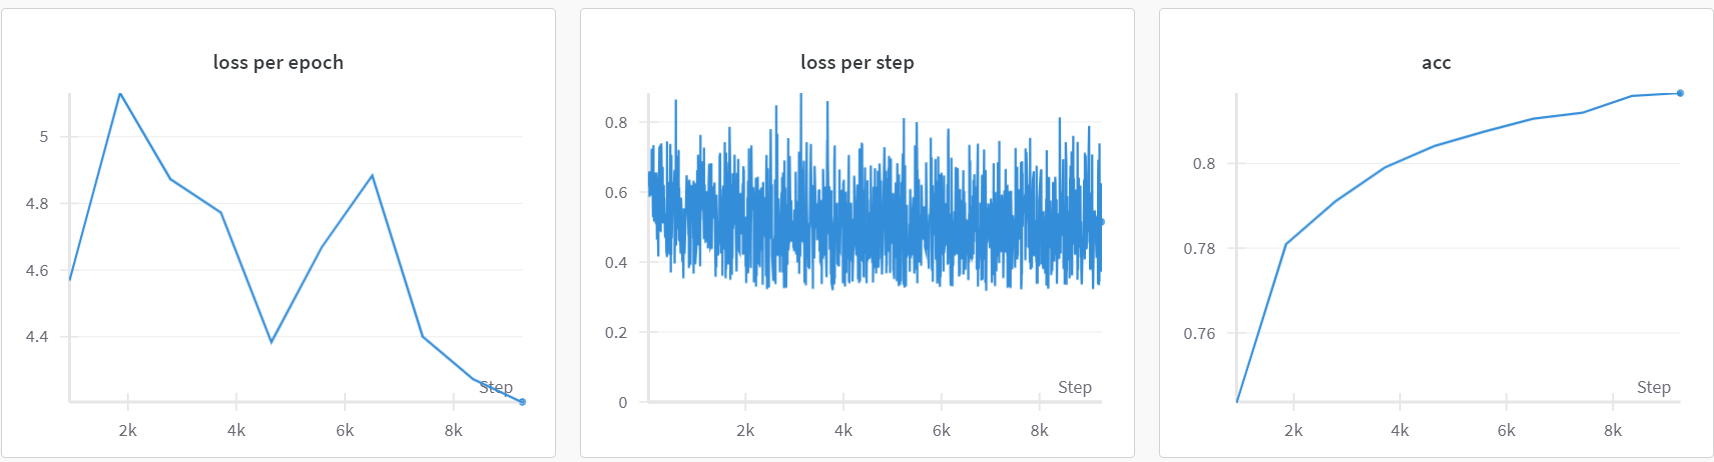

In [52]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model7(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.46      0.61     17531
         1.0       0.29      0.83      0.43      4574

    accuracy                           0.54     22105
   macro avg       0.60      0.65      0.52     22105
weighted avg       0.78      0.54      0.57     22105


Classification Metrics:
Accuracy: 0.5358516172811582
Precision: 0.2864012021036814
Recall: 0.8334062090074333
F1 Score: 0.4263028405278461


## training with talu custom activation function

In [45]:
class TaluActivation(nn.Module):
    def __init__(self, a=0.01):
        super(TaluActivation, self).__init__()
        self.a = a

    def forward(self, x):
        return torch.where(x > 0, x, self.a * torch.tanh(x))

    def derivative(self, x):
        return torch.where(x > 0, torch.ones_like(x), self.a * (1 / torch.cosh(x))**2)

In [46]:
class MLP_talu(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(102, 128),
            TaluActivation(),
            nn.Linear(128, 256),
            TaluActivation(),
            nn.Linear(256, 64),
            TaluActivation(),
            nn.Linear(64, 2),
            nn.Sigmoid()
            )

        def forward(self, x):
            return self.layers(x)

In [47]:
model8 = MLP_talu()

In [48]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model8.parameters(), lr=1e-4, weight_decay=0.001)

In [49]:
import wandb

wandb.init(
    project="mlp",
    config={
    "learning_rate": 1e-4,
    "architecture": "MLP",
    "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cogokeye. Use `wandb login --relogin` to force relogin


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1) 
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model8(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()

        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.7495248174867165, Precision: 0.750085945323827, Recall: 0.8857490821801751, F1 Score: 0.8122921033676219
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.7939759816838741, Precision: 0.793352172487549, Recall: 0.8969041231290595, F1 Score: 0.8419561417316311
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.7995485766123807, Precision: 0.7981622653914187, Recall: 0.8999752894662525, F1 Score: 0.846016641916724
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.8035012311546935, Precision: 0.8009420822835324, Recall: 0.9033641626659136, F1 Score: 0.8490755410303841
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.8083826515184241, Precision: 0.804288328302654, Recall: 0.9077061564529794, F1 Score: 0.852873620405151
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.8127348913559981, Precision: 0.8078971274629577, Recall: 0.9104243151652076, F1 Score: 0.8561019734112297
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.8148624130631993, Precision: 0.809959365537583,

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

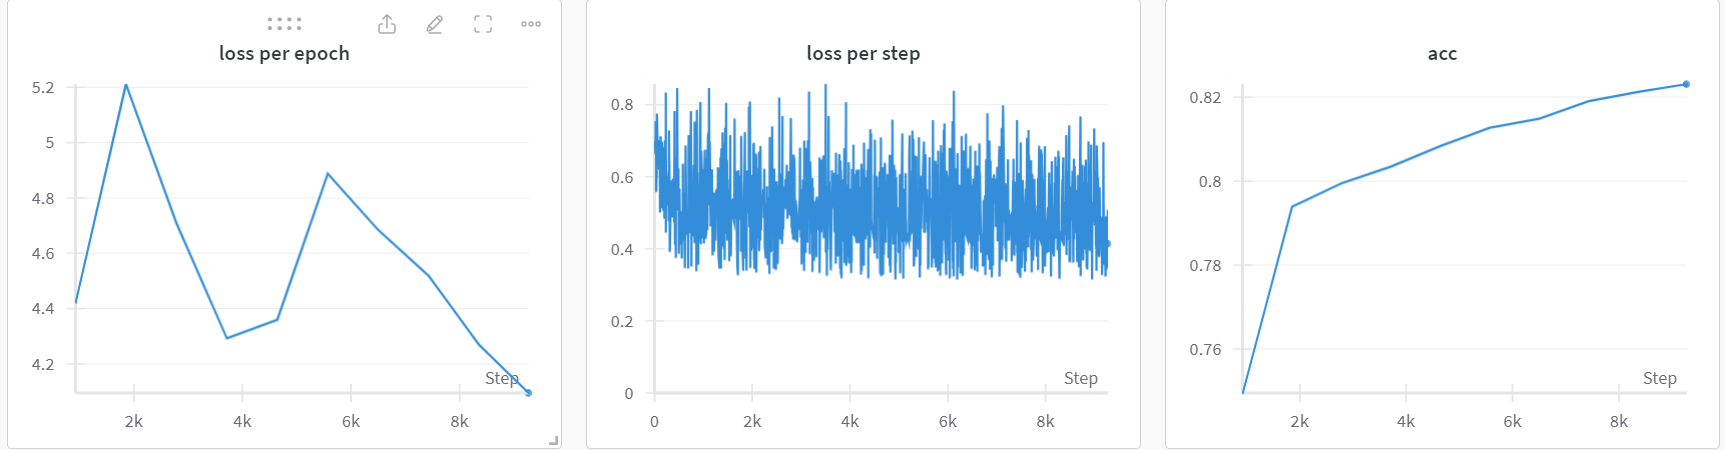

In [52]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model8(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.50      0.64     17531
         1.0       0.30      0.82      0.44      4574

    accuracy                           0.56     22105
   macro avg       0.61      0.66      0.54     22105
weighted avg       0.79      0.56      0.60     22105


Classification Metrics:
Accuracy: 0.5624066953178014
Precision: 0.2976747877152607
Recall: 0.820069960647136
F1 Score: 0.43679767103347894


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1) 
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model8(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()

        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.825910406497041, Precision: 0.8183388829553307, Recall: 0.919620163795538, F1 Score: 0.8660283900136299
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.826914769536481, Precision: 0.8193049464799359, Recall: 0.9200261225642474, F1 Score: 0.8667492538057984
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.829539072962115, Precision: 0.8221311475409836, Recall: 0.9205732843829427, F1 Score: 0.8685718092192913
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.8307810272581969, Precision: 0.8227068734745295, Recall: 0.9221618186952838, F1 Score: 0.8695999533958605
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.8326385589010324, Precision: 0.8244186963033026, Recall: 0.9230619881389438, F1 Score: 0.8709561915547376
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.8330057453885698, Precision: 0.8245434347572601, Recall: 0.9236091499576391, F1 Score: 0.8712693245864517
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.8344312929284202, Precision: 0.826128131066811

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

In [54]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model8(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.50      0.64     17531
         1.0       0.30      0.81      0.43      4574

    accuracy                           0.56     22105
   macro avg       0.60      0.65      0.54     22105
weighted avg       0.78      0.56      0.60     22105


Classification Metrics:
Accuracy: 0.5610042976702103
Precision: 0.29604007633587787
Recall: 0.8139484040227372
F1 Score: 0.4341690962099125


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(10):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1) 
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model8(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()

        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.8385675407145017, Precision: 0.8295616169916875, Recall: 0.9265214628635978, F1 Score: 0.8753647839645138
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.8395827033565165, Precision: 0.8301061343104429, Recall: 0.9276863880259814, F1 Score: 0.8761877771480013
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.8403386755367402, Precision: 0.8310144194282824, Recall: 0.9277040384072296, F1 Score: 0.8767013610888711
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.8412350425504341, Precision: 0.831654835496672, Recall: 0.9284630048009037, F1 Score: 0.8773966490696957
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.8415698302302476, Precision: 0.8325781819333988, Recall: 0.9275981361197402, F1 Score: 0.8775234183238992
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.8420234135383818, Precision: 0.8328054226980457, Recall: 0.9281452979384355, F1 Score: 0.8778944556670395
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.8421206099615535, Precision: 0.833188022129

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

In [56]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model8(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.54      0.67     17531
         1.0       0.30      0.77      0.43      4574

    accuracy                           0.59     22105
   macro avg       0.60      0.65      0.55     22105
weighted avg       0.78      0.59      0.62     22105


Classification Metrics:
Accuracy: 0.5868807961999548
Precision: 0.30322914867898465
Recall: 0.7678181023174464
F1 Score: 0.4347610794751176


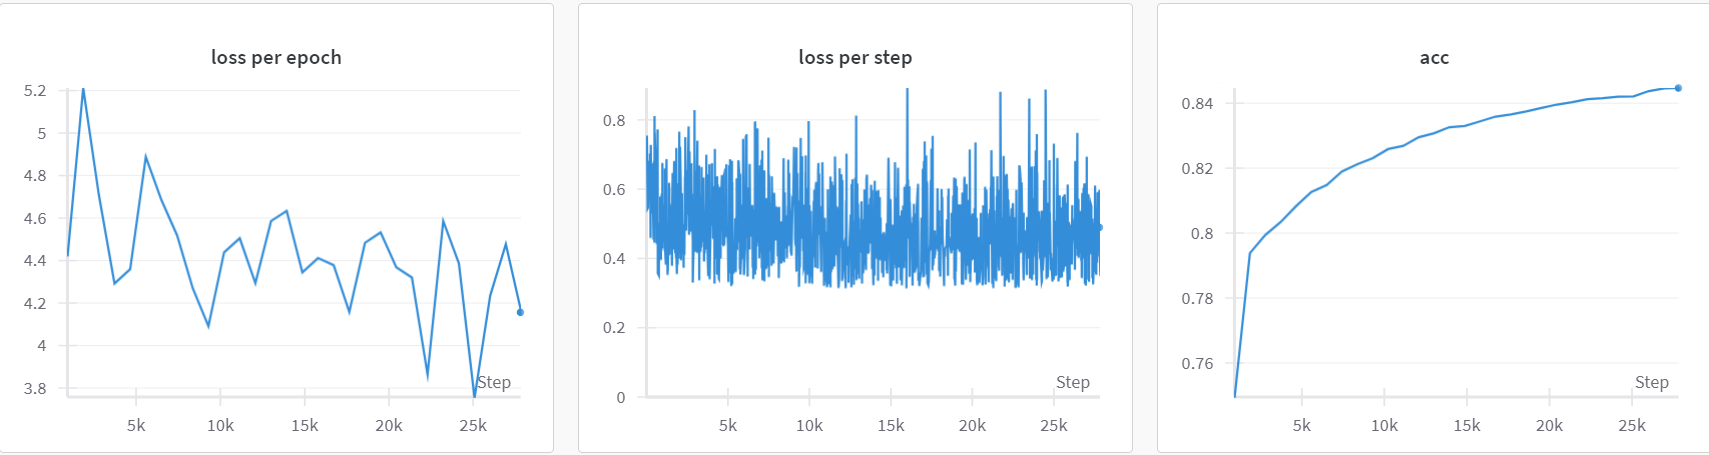

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for epoch in range(20):
    print(f'Starting Epoch {epoch+1}')
    current_loss = 0.0
    predictions = []
    true_labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.float().reshape(-1) 
        targets = targets.long() 
        optimizer.zero_grad()
        outputs = model8(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()

        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        true_labels.extend(targets.tolist())
        
        if i % 10 == 0:
            current_loss = 0.0
            wandb.log({"loss per step": loss})
            
    accuracy = accuracy_score(true_labels, predictions)
    wandb.log({"acc": accuracy, "loss per epoch": current_loss})
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    print(f'Epoch {epoch+1} finished')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

print("Training has completed")
wandb.finish


Starting Epoch 1
Epoch 1 finished
Accuracy: 0.8454900859648365, Precision: 0.8363541054437438, Recall: 0.929310223100819, F1 Score: 0.8803852552901538
Starting Epoch 2
Epoch 2 finished
Accuracy: 0.8458896712600976, Precision: 0.8365357131514594, Recall: 0.9298220841570178, F1 Score: 0.8807155395803729
Starting Epoch 3
Epoch 3 finished
Accuracy: 0.8465592466197244, Precision: 0.8375640169227344, Recall: 0.9294867269133014, F1 Score: 0.8811344432360078
Starting Epoch 4
Epoch 4 finished
Accuracy: 0.8465160482094259, Precision: 0.8373497806320341, Recall: 0.9297514826320249, F1 Score: 0.8811347897360411
Starting Epoch 5
Epoch 5 finished
Accuracy: 0.848125188993045, Precision: 0.8389165618982447, Recall: 0.930439847500706, F1 Score: 0.8823110977212054
Starting Epoch 6
Epoch 6 finished
Accuracy: 0.8479415957492764, Precision: 0.8387543362719201, Recall: 0.9303339452132166, F1 Score: 0.8821737602302968
Starting Epoch 7
Epoch 7 finished
Accuracy: 0.8488811611732688, Precision: 0.84048139694498

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

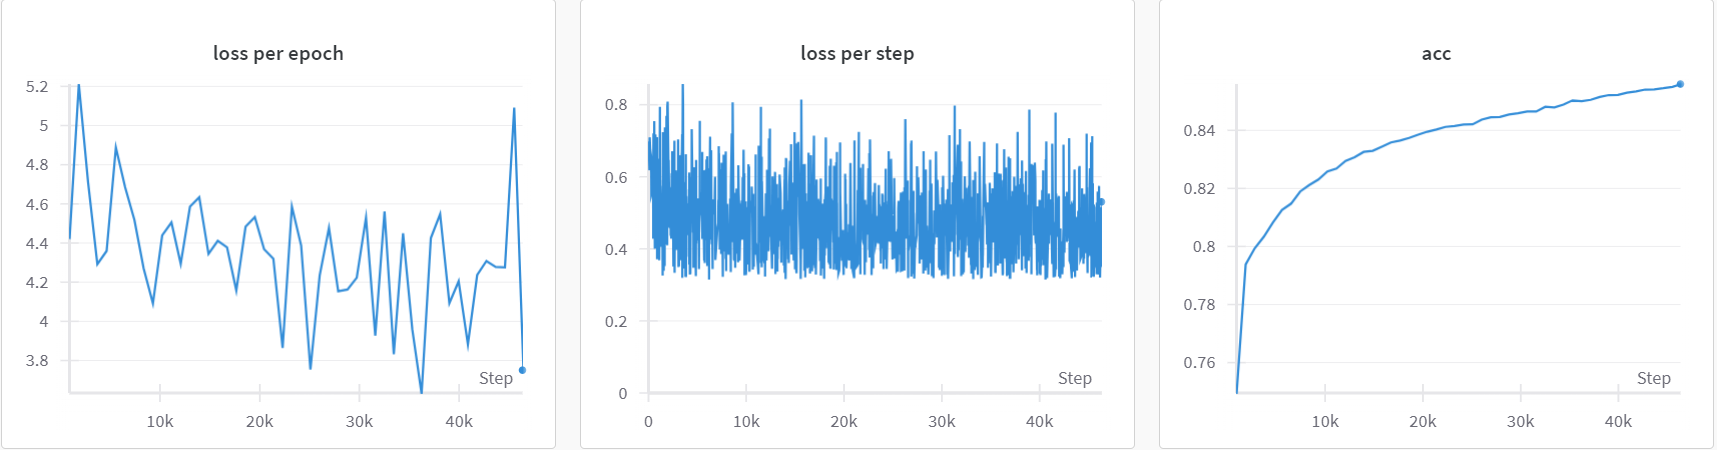

In [58]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()
with torch.no_grad():
    outputs = model8(test_data)
    predicted_labels = outputs.squeeze().tolist()
predicted_labels = np.array(predicted_labels)
predicted_classes = np.argmax(predicted_labels, axis=1)
from sklearn.metrics import classification_report

classification_rep = classification_report(test_targets, predicted_classes)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_targets, predicted_classes)
precision = precision_score(test_targets, predicted_classes)
recall = recall_score(test_targets, predicted_classes)
f1 = f1_score(test_targets, predicted_classes)
print("\nClassification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70     17531
         1.0       0.31      0.73      0.44      4574

    accuracy                           0.61     22105
   macro avg       0.60      0.65      0.57     22105
weighted avg       0.77      0.61      0.65     22105


Classification Metrics:
Accuracy: 0.6096810676317576
Precision: 0.3109141791044776
Recall: 0.7286838653257542
F1 Score: 0.43585719890153
